# Regression

In this tutorial, we'll explore regression models using Python's scikit learn (sklearn) package and the built data set. Please keep in mind that although regression is considered one of the simplest or most basic machine learning techniques, a thorough understanding of the assumptions and limitations is essential for a correct interpretation of the results. 

We'll start by loading the linear_model and diabetes data set from sklearn. Note that we're only loading the components that we need for this exercise since the entire sklearn package is extremely large.

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
diabetes = load_diabetes()

Let's take a look at the diabetes data set. We are interested in how the disease progression depends on factors such as age, sex, BMI (body mass index) and blood pressure. Note that these factors have been mean-centered and scaled by the standard deviation.

The disease progression is the *dependent* variable and age, sex, BMI etc. are the *independent* variables.

In [ ]:
diabetes

To make this a little more readable, we can print just the description

In [3]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

The linear regression fitting function (linear.fit) expects a 2D arrays for the data (# samples x # features). We'll start off by working with a single feature at a time. 

In [4]:
# Extract column corresponding to BMI from data set and convert to (n x 1) arrays
bmi              = diabetes.data[:, np.newaxis, 2]
disease_progress = diabetes.target

Next we'll fit the model and use the model to calculate the expected disease progression. We also calculate the $R^2$ coefficient, which is the percentage of the change in the dependent variable that can be attributed to the change in the independent variable.

$R^2 = 1 - \frac{\Sigma (y - ypred)^2}{\Sigma (y - ymean)^2}$


In [5]:
# Create and fit the model
regr = linear_model.LinearRegression()
regr.fit(bmi, disease_progress)

# Apply the model (predict the disease progression from BMI using linear model)
disease_progress_pred = regr.predict(bmi)

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_[0])
print('Variance score (R2): %.2f' % r2_score(disease_progress, disease_progress_pred))

Intercept:  152.133484163
Coefficient:  949.435260384
Variance score (R2): 0.34


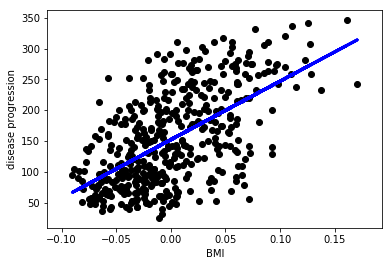

In [6]:
plt.scatter(bmi, disease_progress,  color='black')
plt.plot(bmi, disease_progress_pred, color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('disease progression')

plt.show()

In this example, we used all the the available data to train the model. Often in machine learning applications we want to set aside some of the data to test the model. This allows us to determine if our model has predictive value.

Let's go back and divide our data into training and testing sets.

In [7]:
bmi_train = bmi[:-20] # All but last 20 elements
bmi_test  = bmi[-20:] # Last 20 elements

disease_progress_train = disease_progress[:-20] # All but last 20 elements
disease_progress_test  = disease_progress[-20:] # Last 20 elements

In [8]:
# Create and fit the model
regr = linear_model.LinearRegression()
regr.fit(bmi_train, disease_progress_train)

# Apply the model
disease_progress_pred = regr.predict(bmi_test)

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_[0])
print('Variance score (R2): %.2f' % r2_score(disease_progress_test, disease_progress_pred))

Intercept:  152.918861826
Coefficient:  938.237861251
Variance score (R2): 0.47


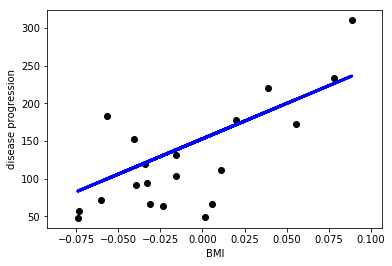

In [9]:
plt.scatter(bmi_test, disease_progress_test,  color='black')
plt.plot(bmi_test, disease_progress_pred, color='blue', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('disease progression')

plt.show()

## Multiple linear regression

So far, we looked at a simple linear regression model that depends on a single variable. We generalize this to a Multiple Linear Regression model of the form

$y_i = b + a_1 x1_i + a_2 x2_i + ...$

In the example below, we use all ten baseline variables to build our model

In [10]:
# Create and fit the model
regr = linear_model.LinearRegression()
regr.fit(diabetes.data, diabetes.target)

# Apply the model (predict the disease progression from BMI using linear model)
disease_progress_pred = regr.predict(diabetes.data)

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_)
print('Variance score (R2): %.2f' % r2_score(diabetes.target, disease_progress_pred))

Intercept:  152.133484163
Coefficient:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Variance score (R2): 0.52


## Combining sklearn with pandas

So far, we've been doing things the hard way - selecting columns from our 2D array of data, saving as new arrays, making sure that we retain multiple dimensions even if we only want one column.

A much easier approach is to use pandas and work directly with data frames. This has the additional advantage that you can the dataframe methods to operate on the data. In the following examples, we train using all the independent variables, three variables and 

In [11]:
import pandas as pd
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
disease_progress = pd.DataFrame(diabetes.target)

In [12]:
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [13]:
disease_progress.head(3)

,0
0,151.0
1,75.0
2,141.0


#### Build the multiple linear regression model using all independent variables

In [14]:
regr = linear_model.LinearRegression()
regr.fit(df, disease_progress)
disease_progress_pred = regr.predict(df)

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_[0])
print('Variance score (R2): %.2f' % r2_score(disease_progress, disease_progress_pred))

Intercept:  [ 152.13348416]
Coefficient:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Variance score (R2): 0.52


#### Build the multiple linear regression model using age, sex and bmi

In [15]:
regr = linear_model.LinearRegression()
regr.fit(df[["age", "sex", "bmi"]], disease_progress)
disease_progress_pred = regr.predict(df[["age", "sex", "bmi"]])

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_[0])
print('Variance score (R2): %.2f' % r2_score(disease_progress, disease_progress_pred))

Intercept:  [ 152.13348416]
Coefficient:  [ 138.9039107   -36.13526678  926.91201212]
Variance score (R2): 0.35


#### Build the ordinary linear regression model using bmi - set aside data for testing

In [21]:
regr = linear_model.LinearRegression()
regr.fit(df[["bmi"]][:-20], disease_progress[:-20])
disease_progress_pred = regr.predict(df[["bmi"]][-20:])

print('Intercept: ', regr.intercept_)
print('Coefficient: ', regr.coef_[0])
print('Variance score (R2): %.2f' % r2_score(disease_progress[-20:], disease_progress_pred[-20:]))

Intercept:  [ 152.91886183]
Coefficient:  [ 938.23786125]
Variance score (R2): 0.47


#### Perform ordinary linear regression, looping over all features

In [17]:
for feature in df.columns.get_values():
    print("Feature: ", feature)
    regr = linear_model.LinearRegression()
    regr.fit(df[[feature]], disease_progress)
    disease_progress_pred = regr.predict(df[[feature]])

    print('Intercept: ', regr.intercept_)
    print('Coefficient: ', regr.coef_[0])
    print('Variance score (R2): %.2f' % r2_score(disease_progress, disease_progress_pred))
    print()

Feature:  age
Intercept:  [ 152.13348416]
Coefficient:  [ 304.18307453]
Variance score (R2): 0.04

Feature:  sex
Intercept:  [ 152.13348416]
Coefficient:  [ 69.71535568]
Variance score (R2): 0.00

Feature:  bmi
Intercept:  [ 152.13348416]
Coefficient:  [ 949.43526038]
Variance score (R2): 0.34

Feature:  bp
Intercept:  [ 152.13348416]
Coefficient:  [ 714.7416437]
Variance score (R2): 0.19

Feature:  s1
Intercept:  [ 152.13348416]
Coefficient:  [ 343.25445189]
Variance score (R2): 0.04

Feature:  s2
Intercept:  [ 152.13348416]
Coefficient:  [ 281.78459335]
Variance score (R2): 0.03

Feature:  s3
Intercept:  [ 152.13348416]
Coefficient:  [-639.14527932]
Variance score (R2): 0.16

Feature:  s4
Intercept:  [ 152.13348416]
Coefficient:  [ 696.88303009]
Variance score (R2): 0.19

Feature:  s5
Intercept:  [ 152.13348416]
Coefficient:  [ 916.13872282]
Variance score (R2): 0.32

Feature:  s6
Intercept:  [ 152.13348416]
Coefficient:  [ 619.22282068]
Variance score (R2): 0.15

